# Abnormality of S&P 500 returns

In this notebook, we are also going to challenge the fundamental tenets of theoretical finance that asset price returns are normally distributed and that these distributions are time invariant (stationary ergodic).


# 1. Import Python libaries

Import the appropriate Python libraries you will need to import, process and analyze financial data from the web. Install the Yahoo finance package.

In [1]:
# Import Python libraries
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
#plt.style.use('seaborn')

# Install web scraper for Yahoo Finance
import yfinance as yf

# 2. Testing for normality of asset price returns

Import over 30 years of S&P 500 ('SPY') price data into a dataframe called equity. Use SPY's closing prices to compute its daily returns. Remove NaNs from your dataframe. Visualize and summarize SPY's daily price returns.  

According to theoretical finance, asset price returns should be normally or gaussian distributed. This implies that the skewness and kurtosis of its distribution should be 0 +/- negligible sampling errors. Compute the skewness and kurtosis of S&P price returns to validate this claim.

Extra Bonus: Repeat this experiment for any time period to check if this claim was ever valid.

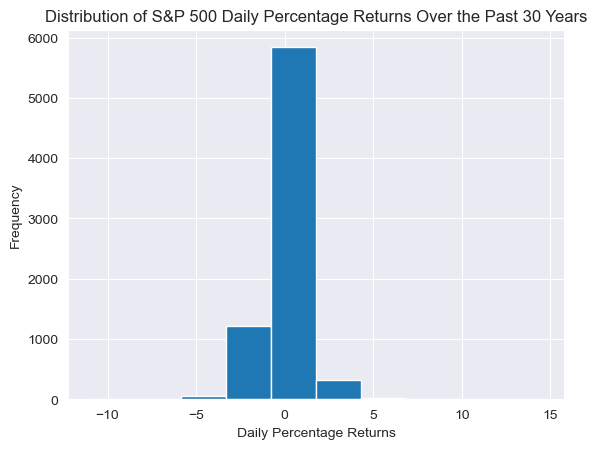

Descriptive statistics of S&P 500 percentage returns:
count    7481.00
mean        0.04
std         1.19
min       -10.94
25%        -0.44
50%         0.07
75%         0.59
max        14.52
Name: Returns, dtype: float64
The skewness of S&P 500 returns is: -0.07 and the kurtosis is: 11.43.


In [2]:
# Import over 30 years of S&P 500 ('SPY') price data into a dataframe called equity
start = datetime(1993, 2, 1)
end = datetime(2022, 10, 15)
equity = yf.Ticker('SPY').history(start=start, end=end)

# Use SPY's closing prices to compute its daily returns. Remove NaNs from your dataframe.
equity['Returns'] = equity['Close'].pct_change(1)*100
equity = equity.dropna()

# Visualize and summarize SPY's daily price returns. Compute its skewness and kurtosis.
plt.hist(equity['Returns']), plt.title('Distribution of S&P 500 Daily Percentage Returns Over the Past 30 Years'), plt.xlabel('Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show();
print("Descriptive statistics of S&P 500 percentage returns:\n{}".format(equity['Returns'].describe().round(2)))
print('The skewness of S&P 500 returns is: {0:.2f} and the kurtosis is: {1:.2f}.'.format(equity['Returns'].skew(), equity['Returns'].kurtosis()))

# 3. Simulating normally distributed asset price returns

Another tenet of theoretical finance is that the normally distributed asset price returns are also time invariant (stationary ergodic). This implies that we can estimate its statisical moments using a sufficiently large sample from any time period.

In the cell below, estimate the mean and standard deviation from SPY's historical data. Use Numpy's random number generator to sample from a normal distribution with the above estimates of it's mean and standard deviation. In other words, you are simulating the world which theoretical finance claims we should be living in.

Create a new column called 'Simulated' and generate the same number of random samples from Numpy's normal distribution as the actual data sample you've imported above for SPY. Visualize and summarize SPY's simulated daily price returns. Also, compute the skewness and kurtosis of the simulated daily price returns.

Since we are sampling randomly from a normal distribution, the expected values for both skewness and kurtosis should be 0 +/- minor sampling errors. Analyze the differences between the actual and simulated returns of S&P 500.

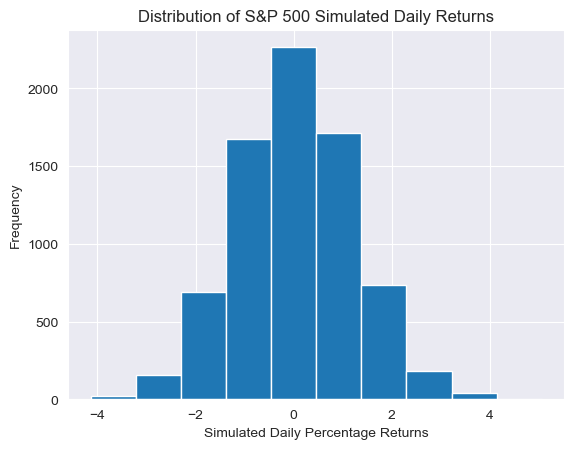

Descriptive statistics of S&P 500 stock's simulated percentage returns:
count    7481.000000
mean        0.037431
std         1.186829
min        -4.134965
25%        -0.769304
50%         0.043810
75%         0.839662
max         5.059605
Name: Simulated, dtype: float64
The skewness of S&P 500 simulated returns is: 0.02 and the kurtosis is: 0.03.


In [3]:
# Estimate the mean and standard deviation from SPY's 30 year historical data
mean = equity['Returns'].mean()
vol = equity['Returns'].std()
sample = equity['Returns'].count()

# Use Numpy's random number generator to sample from a normal distribution with the above estimates of it's mean and standard deviation
# Create a new column called 'Simulated' and generate the same number of random samples from Numpy's normal distribution as the actual data sample you've imported above for SPY
equity['Simulated'] = np.random.normal(mean, vol, sample)

# Visualize and summarize SPY's simulated daily price returns.
plt.hist(equity['Simulated']), plt.title('Distribution of S&P 500 Simulated Daily Returns'), plt.xlabel('Simulated Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show();
print("Descriptive statistics of S&P 500 stock's simulated percentage returns:\n{}".format(equity['Simulated'].describe()))

# Compute the skewness and kurtosis of the simulated daily price returns.
print('The skewness of S&P 500 simulated returns is: {0} and the kurtosis is: {1}.'.format(equity['Simulated'].skew().round(2), equity['Simulated'].kurtosis().round(2)))


# 4a. The actual daily expected shortfall

Let's investigate the real life consequences of following these theoretical models of modern finance. In the cell below, use the non-parametric method you learned in module 3, to calculate the daily expected shortfall at the 99% confidence level based on the actual returns of S&P 500. Assume an investment of 1000 shares of SPY. Hint: Import scipy.stats and sort the actual returns.

In [4]:
from scipy.stats import scoreatpercentile as sp

investment = 1000 * equity['Close'][-1]
confidence = 99
cutoff_percent = 100 - confidence

sorted_returns = equity['Returns'].sort_values()

# Figure out the number of losses that will be in this percentile
frequency = int(sorted_returns.count()*cutoff_percent/100)

# Take the mean of the losses that are in the percentile to calculate Expected Shortfall.
expected_shortfall = sorted_returns[:frequency].mean()

print("The daily Expected Shortfall is {0:.2f}% with a dollar loss of ${1:.2f} based on a current investment of {2:.2f}.".format(expected_shortfall, expected_shortfall*investment/100, investment))

The daily Expected Shortfall is -4.79% with a dollar loss of $-16541.60 based on a current investment of 345186.13.


C:\Users\nicol\AppData\Local\Temp\ipykernel_18436\1217484889.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  investment = 1000 * equity['Close'][-1]


# 4b. The theoretical daily expected shortfall

Now compute the daily expected shortfall at 99% confidence level using the simulated gaussian/normal returns of SPY you generated in section 3 above based on the tenets of financial theory. Remember this is what theoretical finance believes how the data should be distributed. Assume the same investment of 1000 shares of SPY.

In [5]:
#@title
sorted_sim_returns = equity['Simulated'].sort_values()

# Take the mean of the losses that are in the percentile to calculate Expected Shortfall.
sim_expected_shortfall = sorted_sim_returns[:frequency].mean()

print("The daily Expected Shortfall is {0:.2f}% with a dollar loss of ${1:.2f} based on a current investment of {2:.2f}.".format(sim_expected_shortfall, sim_expected_shortfall*investment/100, investment))

The daily Expected Shortfall is -3.13% with a dollar loss of $-10810.39 based on a current investment of 345186.13.


# 4c. Calculate by how much theoretical models underestimated tail risk

In the cell below, calculate the difference between the theoretical and actual expected shortfall, both in terms of percentages and actual dollars.

This would be the amount of risk you would have underestimated or money you would have lost adhering to the tenets of modern finance. These deeply flawed theoretical VaR models are what most banks used in the years leading to the Great Financial Crisis of the last decade.

To get a sense of these losses, change your investment portfolio to hundred's of billions of dollars to calculate the losses or capital shortfalls that the banks experienced.

In [6]:
underestimate = expected_shortfall - sim_expected_shortfall
loss = underestimate/100 * investment
print("The expected shortfall was underestimated by {0:.2f}% which would have led to a dollar shortfall of ${1:.2f} based on a current investment of {2:.2f}.".format(underestimate, loss, investment))

The expected shortfall was underestimated by -1.66% which would have led to a dollar shortfall of $-5731.21 based on a current investment of 345186.13.


# Conclusions

Based on your experiments in this notebook, you can clearly see that normal distributions do not have any skewness (they are symmetrical) or kurtosis (no fat tails). This is why they under estimated the risks of fat tailed, or low probability events with negative returns, that characterize all asset price returns in the real world. You may want to repeat these experiments with different types of assets and time periods. The results will always underestimate the loss potential of low probability events compared to theoretical models of finance that rely on the normality and stationarity of asset price returns.

These are not nice-to-know financial and statistical trivia. Asset price return distributions with negatively skewed, fat tails have the potential to bankrupt investors, corporations and entire economies if their modelers ignore them. The Great Financial Crisis is a recent reminder of the devastating consequences of building theoretical models using elegant mathematical equations that ignore the basic principles of the scientific method and the noisy, ugly, fat tailed realities of real world data.

One of the main culprits of the crisis was the parametric VaR models used by banks to estimate the risks to their portfolios. Of course, these deeply flawed models had the blessings of financial theories and their high priests in academia who invoked fake economic 'Nobel Prizes' for benediction. Unlike these economists, we have everything to lose and not even a fake economics Nobel Prize to win by following their flimsy theoretical models.

As data scientists, we must use data and the scientific method to challenge any theory, at any time. Even the great Albert Einstein was wrong about his views on Quantum Mechanics and his static model of the universe. Recall George Box's insightful quip, "All models are wrong, but some are useful". We should always endeavor to find more useful models with the awareness that they will always be incomplete and inadequate representations of reality.